## Importing Necessary Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Importing Dataset

In [2]:
df_ori = pd.read_excel("heart_disease.xlsx")
df = df_ori

In [3]:
#feature description
df_desc = pd.read_excel("heart_disease.xlsx","Details")
df_desc

,#,Column,Description,Type
0,1,age,age in years,num
1,2,sex,sex (1 = male; 0 = female),str
2,3,cp,chest pain type\n-- Value 1: typical angina\n...,str
3,4,trestbps,resting blood pressure (in mm Hg on admission ...,num
4,5,chol,serum cholestoral in mg/dl,num
5,6,fbs,fbs: (fasting blood sugar > 120 mg/dl) (1 = tr...,str
6,7,restecg,resting electrocardiographic results\n-- Value...,str
7,8,thalach,maximum heart rate achieved,num
8,9,exang,exercise induced angina (1 = yes; 0 = no),str
9,10,oldpeak,ST depression induced by exercise relative to ...,num


Dataset Imported Before Data Exploration

In [4]:
df_ori

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration

In [5]:
obs, feat = df.shape
print("No. of observations: {}".format(obs))
print("No. of features: {}".format(feat))

No. of observations: 303
No. of features: 14


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Separate the dataframe to features X and target y

In [7]:
X = df.drop(["age","sex","cp","trestbps","chol","fbs","restecg",
             "thalach","exang","oldpeak","slope","ca","thal"], axis = 1)
Y = df["target"]

## Normalize Data

Data Standardization gives the data zero mean and unit variance, it is a good practice, especially for algorithms such as KNN which is based on the distance of data points:

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [8]:
X = df[["age","sex","cp","trestbps","chol","fbs","restecg",
        "thalach","exang","oldpeak","slope","ca","thal"]].values

In [9]:
from sklearn.preprocessing import StandardScaler

# using standardscaler to scale the data
scaler = StandardScaler().fit(X)
X = scaler.transform(X.astype(float))

## Train Test Split

Split the data into train and test set of 80:20.

In [10]:
from sklearn.model_selection import train_test_split

#split the data into 80:20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size = 0.20, 
                                                    random_state = 0)

print ('Train set:', X_train.shape,  Y_train.shape)

print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


## Building KNN Model

Import library

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

Investigating the best k for this 80:20 Train & Test data split by plotting k-NN classification accuracy across k values from 1 to 20.

In [12]:
Ks = 21
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(Y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

print ("Listed below are the accuracy of the model respective to the value of K:")
mean_acc

Listed below are the accuracy of the model respective to the value of K:


array([0.81967213, 0.81967213, 0.83606557, 0.85245902, 0.81967213,
       0.85245902, 0.83606557, 0.8852459 , 0.85245902, 0.8852459 ,
       0.83606557, 0.81967213, 0.85245902, 0.85245902, 0.85245902,
       0.85245902, 0.85245902, 0.85245902, 0.81967213, 0.81967213])

Plotting the values into line chart.

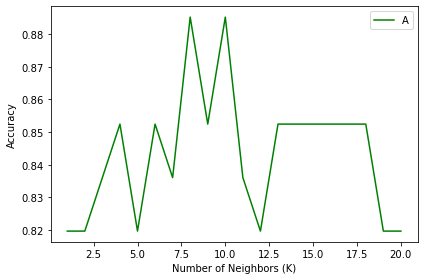

In [13]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

To support the result of the best k from the line chart, we investigate further by comparing the mean error values resulted from each K.

Minimum error:- 0.11475409836065574 at K = 8


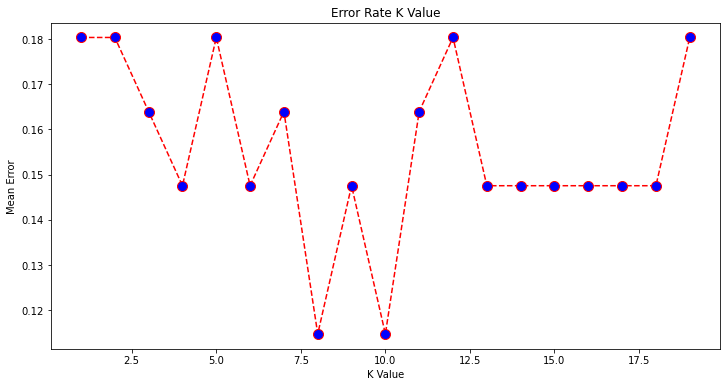

In [14]:
error = []
# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    
    #finding the mean of the scenario when results of test 
    #not identical to value predicted by the model
    
    error.append(np.mean(pred_i != Y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

Based on the investigations above, we found that :

In [15]:
print("Minimum error:-",min(error),"at k =",error.index(min(error))+1)
print( "The best accuracy obtained", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

Minimum error:- 0.11475409836065574 at k = 8
The best accuracy obtained 0.8852459016393442 with k= 8


## Checking if this is a good model

Based on the result on accuracy for K values of 1 to 20, it seems that K=9 achieved the most accuracy.<br>
So, in this section, we are checking further into the model to compare the train and test results into :
<br>
1. Precision
<br>
2. Recall
<br>
3. F1
<br>
4. KNN Accuracy
<br>
5. Confusion Matrix
<br>

Evaluating model.

In [16]:
colors = ['#F93822','#FDD20E']


def model_evaluation(classifier):
    
    
    knn = KNeighborsClassifier(n_neighbors=classifier)    
    y_proba_knn = knn.fit(X_train, Y_train).predict_proba(X_test)
    knn_predict = knn.predict(X_test)
    #roc = roc_auc_score(Y_test, y_proba_knn[:,1])
    
    # Confusion Matrix
    cm = confusion_matrix(Y_test,knn_predict)
    
    # Labelling the matrix
    names = ['True Neg','False Pos','False Neg','True Pos']
    
    # Counts of the test data and labelling it on the matrix
    counts = [value for value in cm.flatten()]
    
    # Get the % of the grand total on the matrix
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(Y_test,knn_predict))
    print('KNN Accuracy= {:.2f}'.format(accuracy_score(Y_test, knn_predict)))


Evaluate the model for K =  8
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61

KNN Accuracy= 0.89


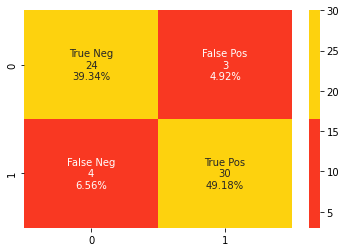

In [17]:
selected_k = mean_acc.argmax()+1
print ("Evaluate the model for K = ", selected_k)
model_evaluation(selected_k)